# 1. Hamming (7,4) Explicação do Código:

### 1.1 Para $\alpha = 0.01$:

In [139]:
import numpy as np
import random
import matplotlib.pyplot as plt

É dedicada uma mensagem de $10000$ bits que são colocados em um array.

In [183]:
bits = 10000
mes_env = list(np.random.randint(0,2,bits))

O array é separado em grupos de quatro.

In [176]:
lista = [mes_env[i:i + 4] for i in range(0, len(mes_env), 4) ]

Para cada grupo é adicionado 3 bits de redundância. Para calcular esses 3 bits (x,y,z) é utilizado a operação XOR, que codifica a mensagem enviada.

In [177]:
mes_cod = []
for i in range(2500):
    mes_cod.append(0)
for i in range(2500):
    x = lista[i][0]^lista[i][1]^lista[i][3]
    y = lista[i][0]^lista[i][2]^lista[i][3]
    z = lista[i][1]^lista[i][2]^lista[i][3]
    redund = [x,y,z]
    mes_cod[i] = lista[i]+redund
    
lista_cod = list(mes_cod)
#lista_cod

Para toda a mensagem recebida é dedicado uma probabilidade de erro de $\alpha=0.01$ 

In [178]:
alfa = 0.01
mes_receb = np.array(mes_cod)
n = mes_receb[np.random.rand(*mes_receb.shape) < alfa]
mes_receb[np.random.rand(*mes_receb.shape) < alfa] = 1
lista_receb = mes_receb.tolist()
#lista_receb

Para conferir se ocorreu erro outra operação XOR é feita, se houver disparidade o contador de erros é acionado. Somado a isso, a probabilidade de erro é calculada.

In [181]:
nerros = 0
ferros = []
for i in range(2500):
    ferros.append(0)
for i in range(2500):
    if(lista_receb[i][0]^lista_receb[i][1]^lista_receb[i][3] == lista_receb[i][4]) == False:
        nerros += 1
    if(lista_receb[i][0]^lista_receb[i][2]^lista_receb[i][3] == lista_receb[i][5]) == False:
        nerros += 1
    if(lista_receb[i][1]^lista_receb[i][2]^lista_receb[i][3] == lista_receb[i][6]) == False:
        nerros += 1
    ferros[i] = nerros/(i+1)    
print("Número de erros: ",nerros)
print("Probabilidade de erros: ",nerros/2500)    

Número de erros:  166
Probabilidade de erros:  0.0664


### 1.2 Valor Teórico da Probabilidade de Erro:

In [188]:
alfa = 0.01
pe = 1-(1-alfa)**4
pe

0.039403990000000055

Podemos perceber que o valor teórico está coerente com a simulação.

### 1.3 Gráfico de $\alpha$:

In [ ]:
# x = np.arange(1,bits/4+1,1)
plt.figure(figsize=(10,5),dpi=70)
plt.plot(x,ferros,label='erro')
plt.title('Convergência para o valor real de alfa')
plt.ylabel('Prob. de erro')
plt.xlabel('n')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()    
plt.show()

### 1.4 Vantagem em relação ao código da repetição

O código da repetição transforma $1$ bit $\to3$ bits, tendo assim uma eficiência de $33.33\%$. Já o código de Hamming (7,4) transforma $4$ bits $\to7$ bits, tendo assim uma eficiência de $57.10\%$

# 2. Variação de $\alpha$ entre $0.01$ e $0.21$ com passos de $0.03$:

In [185]:
def repete(alfa,bits):
    mes_env = list(np.random.randint(0,2,bits))
    
    lista = [mes_env[i:i + 4] for i in range(0, len(mes_env), 4) ]
    
    mes_cod = []
    for i in range(2500):
        mes_cod.append(0)
    for i in range(2500):
        x = lista[i][0]^lista[i][1]^lista[i][3]
        y = lista[i][0]^lista[i][2]^lista[i][3]
        z = lista[i][1]^lista[i][2]^lista[i][3]
        redund = [x,y,z]
        mes_cod[i] = lista[i]+redund
    lista_cod = list(mes_cod)
    
    mes_receb = np.array(mes_cod)
    n = mes_receb[np.random.rand(*mes_receb.shape) < alfa]
    mes_receb[np.random.rand(*mes_receb.shape) < alfa] = 1
    lista_receb = mes_receb.tolist()
    
    nerros = 0
    ferros = []
    for i in range(2500):
        ferros.append(0)
    for i in range(2500):
        if(lista_receb[i][0]^lista_receb[i][1]^lista_receb[i][3] == lista_receb[i][4]) == False:
            nerros += 1
        if(lista_receb[i][0]^lista_receb[i][2]^lista_receb[i][3] == lista_receb[i][5]) == False:
            nerros += 1
        if(lista_receb[i][1]^lista_receb[i][2]^lista_receb[i][3] == lista_receb[i][6]) == False:
            nerros += 1
        ferros[i] = nerros/(i+1)    
    print("Número de erros: ",nerros)
    print("Probabilidade de erros: ",nerros/2500)    
    
    x = np.arange(1,bits/4+1,1)
    plt.figure(figsize=(10,5),dpi=70)
    plt.plot(x,ferros,label='erro')
    plt.title('Convergência para o valor real de alfa')
    plt.ylabel('Prob. de erro')
    plt.xlabel('n')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()    
    plt.show()

Qual o valor de alfa? 0.01
Número de erros:  134
Probabilidade de erros:  0.0536


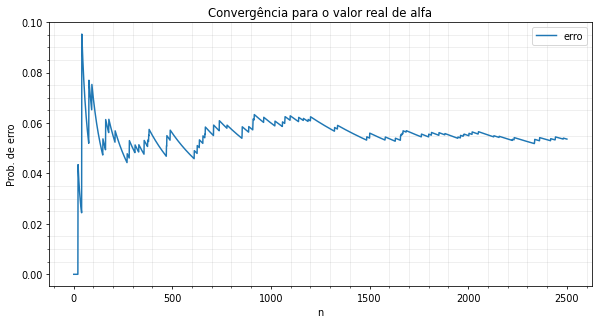

Qual o valor de alfa? 0.04
Número de erros:  559
Probabilidade de erros:  0.2236


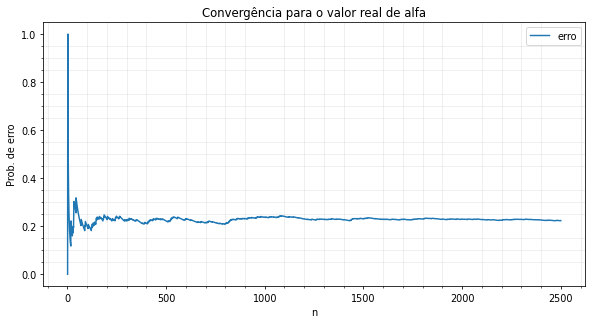

Qual o valor de alfa? 0.07
Número de erros:  981
Probabilidade de erros:  0.3924


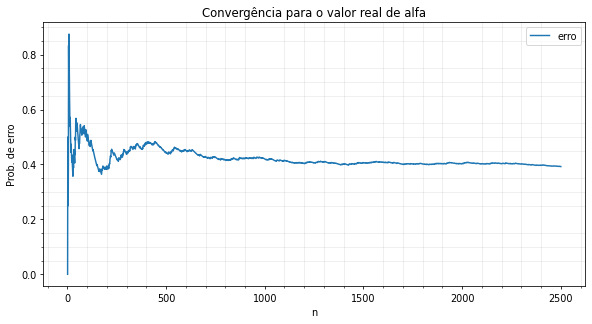

Qual o valor de alfa? 0.10
Número de erros:  1300
Probabilidade de erros:  0.52


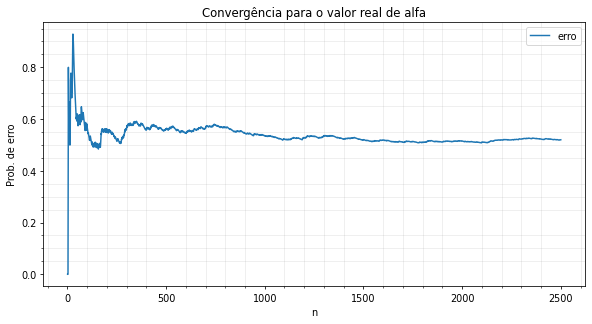

Qual o valor de alfa? 0.13
Número de erros:  1623
Probabilidade de erros:  0.6492


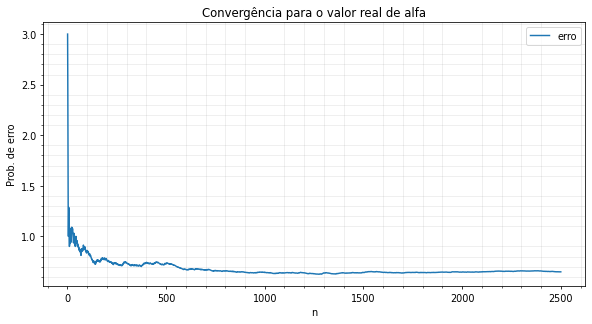

Qual o valor de alfa? 0.16
Número de erros:  1847
Probabilidade de erros:  0.7388


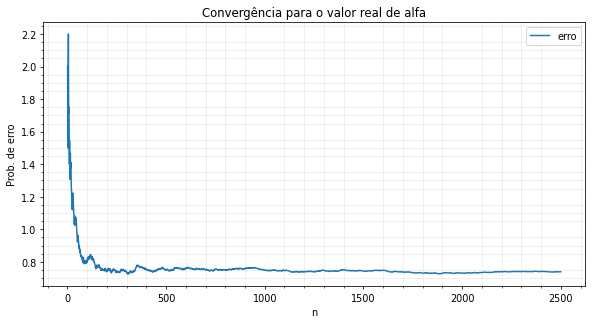

Qual o valor de alfa? 0.19
Número de erros:  2057
Probabilidade de erros:  0.8228


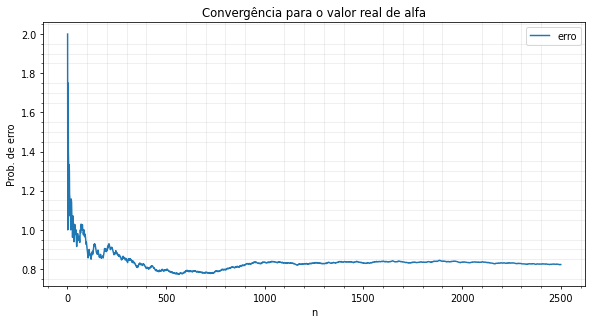

Qual o valor de alfa? 0.21
Número de erros:  2271
Probabilidade de erros:  0.9084


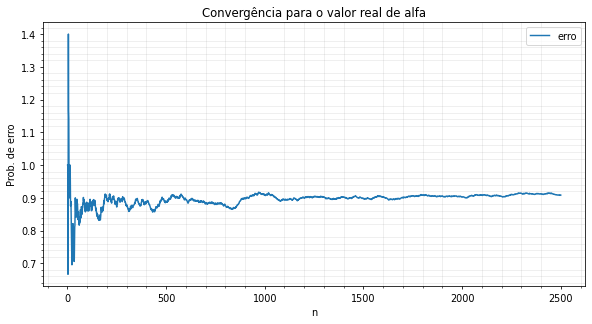

KeyboardInterrupt: Interrupted by user

In [186]:
def menu():
    alfa = float(input('Qual o valor de alfa? '))
    bits = 10000
    repete(alfa,bits)
while True:
    menu()